## Heart Failure prediction 
Problem statement: To predict the patient will have heart failure based on its medical reports and whether he smokes. The features included in this are the age of the patient, if the patient suffers from anaemia and diabetes, the fraction of blood pumping out of the heart.

Dataset description:<br><br>
age: age of the patient (years) <br>
anaemia: decrease of red blood cells or hemoglobin (boolean)<br>
creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)<br>
diabetes: if the patient has diabetes (boolean)<br>
ejection fraction: percentage of blood leaving the heart at each contraction (percentage)<br>
high blood pressure: if the patient has hypertension (boolean)<br>
platelets: platelets in the blood (kiloplatelets/mL)<br>
sex: woman or man (binary)<br>
serum creatinine: level of serum creatinine in the blood (mg/dL)<br>
serum sodium: level of serum sodium in the blood (mEq/L)<br>
smoking: if the patient smokes or not (boolean)<br>
time: follow-up period (days)<br>
DEATH_EVENT: if the patient died during the follow-up period (boolean)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [3]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0


In [4]:
def int_to_bool(df,x):
    df[x] = df[x].astype(bool)
    return df

df = int_to_bool(df,'anaemia')
df = int_to_bool(df,'diabetes')
df = int_to_bool(df,'high_blood_pressure')
df = int_to_bool(df,'smoking')
df = int_to_bool(df,'DEATH_EVENT')

df.dtypes

age                         float64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

### Data cleaning

In [5]:
null_count = df.isnull().sum().sum()
duplicate_count = df.duplicated().sum()
print("Number of null values:", null_count, 
      "\nNumber of duplicate values:", duplicate_count,
      '\nOriginal data shape:', df.shape[0])

df = df.drop_duplicates()
df.shape

Number of null values: 0 
Number of duplicate values: 3680 
Original data shape: 5000


(1320, 13)

In [6]:
# creating a datafram with necessary features

features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','DEATH_EVENT','time']

data = df[features]

# to count the number of true and false values
data['DEATH_EVENT'].value_counts()

DEATH_EVENT
False    923
True     397
Name: count, dtype: int64

In [7]:
# splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('DEATH_EVENT',axis=1), 
                                                    data['DEATH_EVENT'], test_size=0.30, 
                                                    random_state=101)

In [8]:
# training the logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
# testing the accuracy of the model

predictions = model.predict(X_test)
from sklearn.metrics import f1_score,accuracy_score
print("Accuracy score: ",accuracy_score(y_test,predictions),
      "\nF1 score: ",f1_score(y_test,predictions))

Accuracy score:  0.8484848484848485 
F1 score:  0.702970297029703


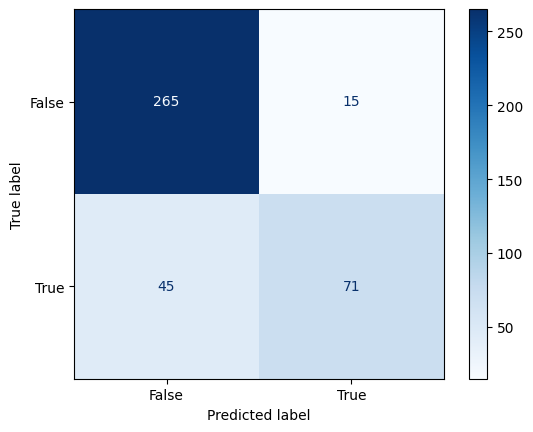

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Conclusion:
The F-1 score for the model is calculated and the accuracy of the model which comes out to be 70.30% and 84.85% respectively. The F-1 score is chosen because the problem at hand was a binary problem and F-1 score is dependent on the precision and recall of the model. 

The confusion matrix shows us that the model is good at predicting the death events as False than the class True which could be due to several reasons as an unbalanced dataset and the lack of the data in the dataset which could cause a bias amongst the classes and overall a skewed dataset (True = 397, False = 923). 

CPK, and specifically its cardiac isoenzyme CK-MB, plays a significant role in the context of heart failure. While CK-MB is primarily known as a marker for myocardial injury, its function in energy metabolism is crucial for cardiac performance. Elevated CK-MB levels can indicate myocardial stress or injury, providing valuable information for the diagnosis and management of heart failure. The levels of CPK are found lower in a smoking person than a non-smoking which could be the leading cause of heart failure. Smoking adversely affects CPK levels primarily by causing myocardial and skeletal muscle injury through mechanisms involving oxidative stress, inflammation, and ischemia. Elevated CPK levels in smokers can indicate underlying cardiovascular stress or damage, necessitating careful clinical assessment and monitoring.